In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def compare_pam120(string1,string2,fulloutput=True):
    import numpy as np
    import matplotlib.pyplot as plt

    aa_index = {'C': 0, 'S': 1, 'T': 2, 'P': 3, 'A': 4, 'G': 5, 'N': 6, 'D': 7
               , 'E': 8, 'Q': 9, 'H': 10, 'R': 11, 'K': 12, 'M': 13, 'I': 14, 'L': 15
               , 'V': 16, 'F': 17, 'Y': 18, 'W': 19}
    PAM120 = np.array([ [9]
                       ,[-1, 3]
                       ,[-3, 2, 4]

                       ,[-3, 1,-1, 6]
                       ,[-3, 1, 1, 1, 3]
                       ,[-5, 1,-1,-2, 1, 5]

                       ,[-5, 1, 0,-2, 0, 0, 4]                   
                       ,[-7, 0,-1,-2, 0, 0, 2, 5]
                       ,[-7,-1,-2,-1, 0,-1, 1, 3, 5]
                       ,[-7,-2,-2, 0,-1,-3, 0, 1, 2, 6]

                       ,[-4,-2,-3,-1,-3,-4, 2, 0,-1, 3, 7]
                       ,[-4,-1,-2,-1,-3,-4,-1,-3,-3, 1, 1, 6]
                       ,[-7,-1,-1,-2,-2,-3, 1,-1,-1, 0,-2, 2, 5]

                       ,[-6,-2,-1,-3,-2,-4,-3,-4,-4,-1,-4,-1, 0, 8]
                       ,[-3,-2, 0,-3,-1,-4,-2,-3,-3,-3,-4,-2,-2, 1, 6]                   
                       ,[-7,-4,-3,-3,-3,-5,-4,-5,-4,-2,-3,-4,-4, 3, 1, 5]
                       ,[-2,-2, 0,-2, 0,-2,-3,-3,-3,-3,-3,-3,-4, 1, 3, 1, 5]

                       ,[-6,-3,-4,-5,-4,-5,-4,-7,-6,-6,-2,-4,-6,-1, 0, 0,-3, 8]
                       ,[-1,-3,-3,-6,-4,-6,-2,-5,-4,-5,-1,-6,-6,-4,-2,-3,-3, 4, 8]
                       ,[-8,-2,-6,-7,-7,-8,-5,-8,-8,-6,-5, 1,-5,-7,-7,-5,-8,-1,-1,12]])

    score = 0
    visual = np.zeros((1,len(string1)))
    for i in range(0,len(string1)):
            previous_score = score
            if aa_index[string1[i]] > aa_index[string2[i]]:
                score += int(PAM120[int(aa_index[string1[i]])][int(aa_index[string2[i]])])
            else:
                score += int(PAM120[int(aa_index[string2[i]])][int(aa_index[string1[i]])])
            if fulloutput == True:
                print score-previous_score, score, aa_index[string1[i]], aa_index[string2[i]], i, string1[i], string1[i]
            visual[0,i] = score-previous_score
    print "final score: ", score
    plt.imshow(visual,cmap="seismic_r",vmin=int(np.min(np.min(PAM120))), vmax=int(np.max(np.max(PAM120))),interpolation='none')
    return score

9 9 0 0 0 C C
9 18 0 0 1 C C
3 21 1 1 2 S S
3 24 1 1 3 S S
9 33 0 0 4 C C
9 42 0 0 5 C C
4 46 2 2 6 T T
6 52 3 3 7 P P
3 55 4 4 8 A A
5 60 5 5 9 G G
4 64 6 6 10 N N
5 69 7 7 11 D D
5 74 8 8 12 E E
7 81 10 10 13 H H
6 87 11 11 14 R R
5 92 16 16 15 V V
5 97 15 15 16 L L
8 105 18 18 17 Y Y
12 117 19 19 18 W W
5 122 7 7 19 D D
5 127 8 8 20 E E
6 133 9 9 21 Q Q
7 140 10 10 22 H H
final score:  140


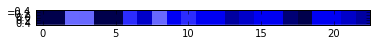

In [11]:
example1 = 'CCSSCCTPAGNDEHRVLYWDEQH'
perfect_match = compare_pam120(example1, example1)

9 9 0 0 0 C C
9 18 0 0 1 C C
3 21 1 1 2 S S
3 24 1 1 3 S S
9 33 0 0 4 C C
9 42 0 0 5 C C
4 46 2 2 6 T T
6 52 3 3 7 P P
3 55 4 4 8 A A
5 60 5 5 9 G G
0 60 6 4 10 N N
5 65 7 7 11 D D
5 70 8 8 12 E E
7 77 10 10 13 H H
-3 74 11 4 14 R R
5 79 16 16 15 V V
5 84 15 15 16 L L
8 92 18 18 17 Y Y
-7 85 19 4 18 W W
5 90 7 7 19 D D
5 95 8 8 20 E E
-1 94 9 4 21 Q Q
7 101 10 10 22 H H
final score:  101


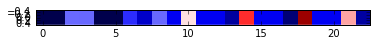

In [12]:
example2 = 'CCSSCCTPAGADEHAVLYADEAH'
a_few_substitutions = compare_pam120(example1, example2)

final score:  815


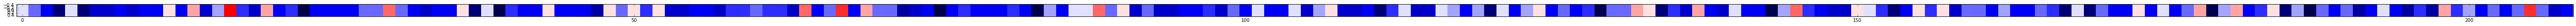

In [13]:
#heavy chain, constant region, Fc, Igg1, human
#https://www.ncbi.nlm.nih.gov/protein/AEV43323.1

# versus


human_heavychain_fragment = 'PSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSREEMTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPG'
mouse_heavychain_fragment = 'SSVFIFPPKPKDVLTITLTPKVTCVVVDISKDDPEVQFSWFVDDVEVHTAQTQPREEQFNSTFRSVSELPIMHQDWLNGKEFKCRVNSAAFPAPIEKTISKTKGRPKAPQVYTIPPPKEQMAKDKVSLTCMITDFFPEDITVEWQWNGQPAENYKNTQPIMDTDGSYFVYSKLNVQKSNWEAGNTFTCSVLHEGLHNHHTEKSLSHSPG'

plt.rcParams['figure.figsize'] = 100,1
human_versus_mouse = compare_pam120(human_heavychain_fragment,mouse_heavychain_fragment, fulloutput=False)


final score:  1047


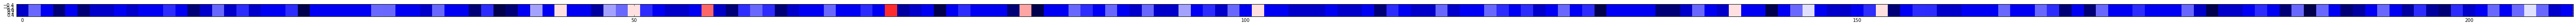

In [14]:
human_heavychain_fragment = 'PSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSREEMTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPG'
macac_heavychain_fragment = 'PSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPDVKFNWYVNGAEVHHAQTKPRETQYNSTYRVVSVLTVTHQDWLNGKEYTCKVSNKALPAPIQKTISKDKGQPREPQVYTLPPSREELTKNQVSLTCLVKGFYPSDIVVEWESSGQPENTYKTTPPVLDSDGSYFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSVSPG'

human_versus_monkey = compare_pam120(human_heavychain_fragment,macac_heavychain_fragment,fulloutput=False)

In [17]:
def compare_BLOSUM62(string1,string2,fulloutput=True):
    import numpy as np
    import matplotlib.pyplot as plt

    aa_index = {'C': 0, 'S': 1, 'T': 2, 'P': 3, 'A': 4, 'G': 5, 'N': 6, 'D': 7
               , 'E': 8, 'Q': 9, 'H': 10, 'R': 11, 'K': 12, 'M': 13, 'I': 14, 'L': 15
               , 'V': 16, 'F': 17, 'Y': 18, 'W': 19}
    PAM120 = np.array([ [9]
                       ,[-1, 4]
                       ,[-1, 1, 5]

                       ,[-3,-1,-1, 7]
                       ,[ 0, 1, 0,-1, 4]
                       ,[-3, 0,-2,-2, 0, 6]

                       ,[-3, 1, 0,-2,-2, 0, 6]                   
                       ,[-3, 0,-1,-1,-2,-1, 1, 6]
                       ,[-4, 0,-1,-1,-1,-2, 0, 2, 5]
                       ,[-3, 0,-1,-1,-1,-2, 0, 0, 2, 5]

                       ,[-3,-1,-2,-2,-2,-2, 1,-1, 0, 0, 8]
                       ,[-3,-1,-1,-2,-1,-2, 0,-2, 0, 1, 0, 5]
                       ,[-3, 0,-1,-1,-1,-2, 0,-1, 1, 1,-1, 2, 5]

                       ,[-1,-1,-1,-2,-1,-3,-2,-3,-2, 0,-2,-1,-1, 5]
                       ,[-1,-2,-1,-3,-1,-4,-3,-3,-3,-3,-3,-3,-3, 1, 4]                   
                       ,[-1,-2,-1,-3,-1,-4,-3,-4,-3,-2,-3,-2,-2, 2, 2, 4]
                       ,[-1,-2, 0,-2, 0,-3,-3,-3,-2,-2,-3, 3, 2, 1, 3, 1, 4]

                       ,[-2,-2,-2,-4,-2,-3,-3,-3,-3,-3,-1,-3,-3, 0, 0, 0,-1, 6]
                       ,[-2,-2,-2,-3,-2,-3,-2,-3,-2,-1, 2,-2,-2,-1,-1,-1,-1, 3, 7]
                       ,[-2,-3,-2,-4,-3,-2,-4,-4,-3,-2,-2,-3,-3,-1,-3,-2,-3, 1, 2,11]])

    score = 0
    visual = np.zeros((1,len(string1)))
    for i in range(0,len(string1)):
            previous_score = score
            if aa_index[string1[i]] > aa_index[string2[i]]:
                score += int(PAM120[int(aa_index[string1[i]])][int(aa_index[string2[i]])])
            else:
                score += int(PAM120[int(aa_index[string2[i]])][int(aa_index[string1[i]])])
            if fulloutput == True:
                print score-previous_score, score, aa_index[string1[i]], aa_index[string2[i]], i, j, string1[i], string1[i]
            visual[0,i] = score-previous_score
    print "final score: ", score
    plt.imshow(visual,cmap="seismic_r",vmin=int(np.min(np.min(PAM120))), vmax=int(np.max(np.max(PAM120))),interpolation='none')
    return score

final score:  1045


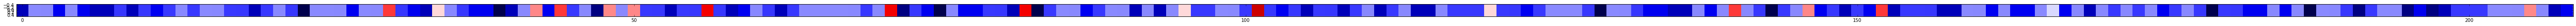

In [18]:
human_heavychain_fragment = 'PSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSREEMTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPG'
macac_heavychain_fragment = 'PSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPDVKFNWYVNGAEVHHAQTKPRETQYNSTYRVVSVLTVTHQDWLNGKEYTCKVSNKALPAPIQKTISKDKGQPREPQVYTLPPSREELTKNQVSLTCLVKGFYPSDIVVEWESSGQPENTYKTTPPVLDSDGSYFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSVSPG'

human_versus_monkey = compare_BLOSUM62(human_heavychain_fragment,macac_heavychain_fragment,fulloutput=False)

In [25]:
def score_DNA(string1,string2,fulloutput=True):
    import numpy as np
    import matplotlib.pyplot as plt
    aa_index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    DNA_score_matrix = np.array([ [67]
                       ,[-96, 100]
                       ,[-20, -79, 100]

                       ,[-117,-20,-96, 67]])
    score = 0
    visual = np.zeros((1,len(string1)))
    for i in range(0,len(string1)):
            previous_score = score
            if aa_index[string1[i]] > aa_index[string2[i]]:
                score += int(DNA_score_matrix[int(aa_index[string1[i]])][int(aa_index[string2[i]])])
            else:
                score += int(DNA_score_matrix[int(aa_index[string2[i]])][int(aa_index[string1[i]])])
            if fulloutput == True:
                print score-previous_score, score, aa_index[string1[i]], aa_index[string2[i]], i, j, string1[i], string1[i]
            visual[0,i] = score-previous_score
    print "final score: ", score
    plt.imshow(visual,cmap="seismic_r",vmin=int(np.min(np.min(DNA_score_matrix))), vmax=int(np.max(np.max(DNA_score_matrix))),interpolation='none')
    return score

final score:  700


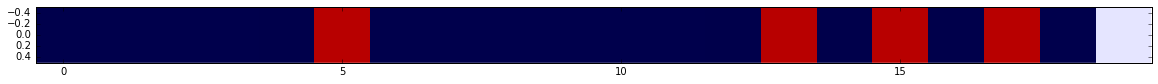

In [29]:
dnaseq1 = 'ATATATCGTATATAGCTATG'
dnaseq2 = 'ATATAGCGTATATCGATCTAG'

human_versus_monkey = score_DNA(dnaseq1,dnaseq2,fulloutput=False)